In [18]:
import numpy as np
import skimage.draw

from mrcnn.config import Config
from mrcnn import model as modellib, utils

from samples.potato.potato import PotatoConfig

In [9]:
class InferenceConfig(PotatoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()

In [10]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir='../../logs/')

weights_path = "../../logs/weights_same_train_and_val/mask_rcnn_potato_0030.h5"

model.load_weights(weights_path, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [51]:
zeros = np.zeros([1440, 1920, 3])
yellow = zeros
yellow[:,:, 0] = 255
yellow[:,:, 1] = 172
yellow[:,:, 2] = 38

def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # Copy color pixels from the original color image where mask is set
    if mask.shape[-1] > 0:
        # We're treating all instances as one, so collapse the mask into one layer
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        # splash = np.where(mask, image, gray).astype(np.uint8)
        splash = np.where(mask, yellow, gray).astype(np.uint8)
    else:
        splash = gray.astype(np.uint8)
    return splash

In [52]:
image = skimage.io.imread('./data/val/egel_van_boven_146.png')

In [53]:
r = model.detect([image], verbose=1)[0]

masks = r['masks']

Processing 1 images
image                    shape: (1440, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [54]:
splash = color_splash(image, masks)

In [55]:
import matplotlib.pyplot as plt

In [56]:
from PIL import Image

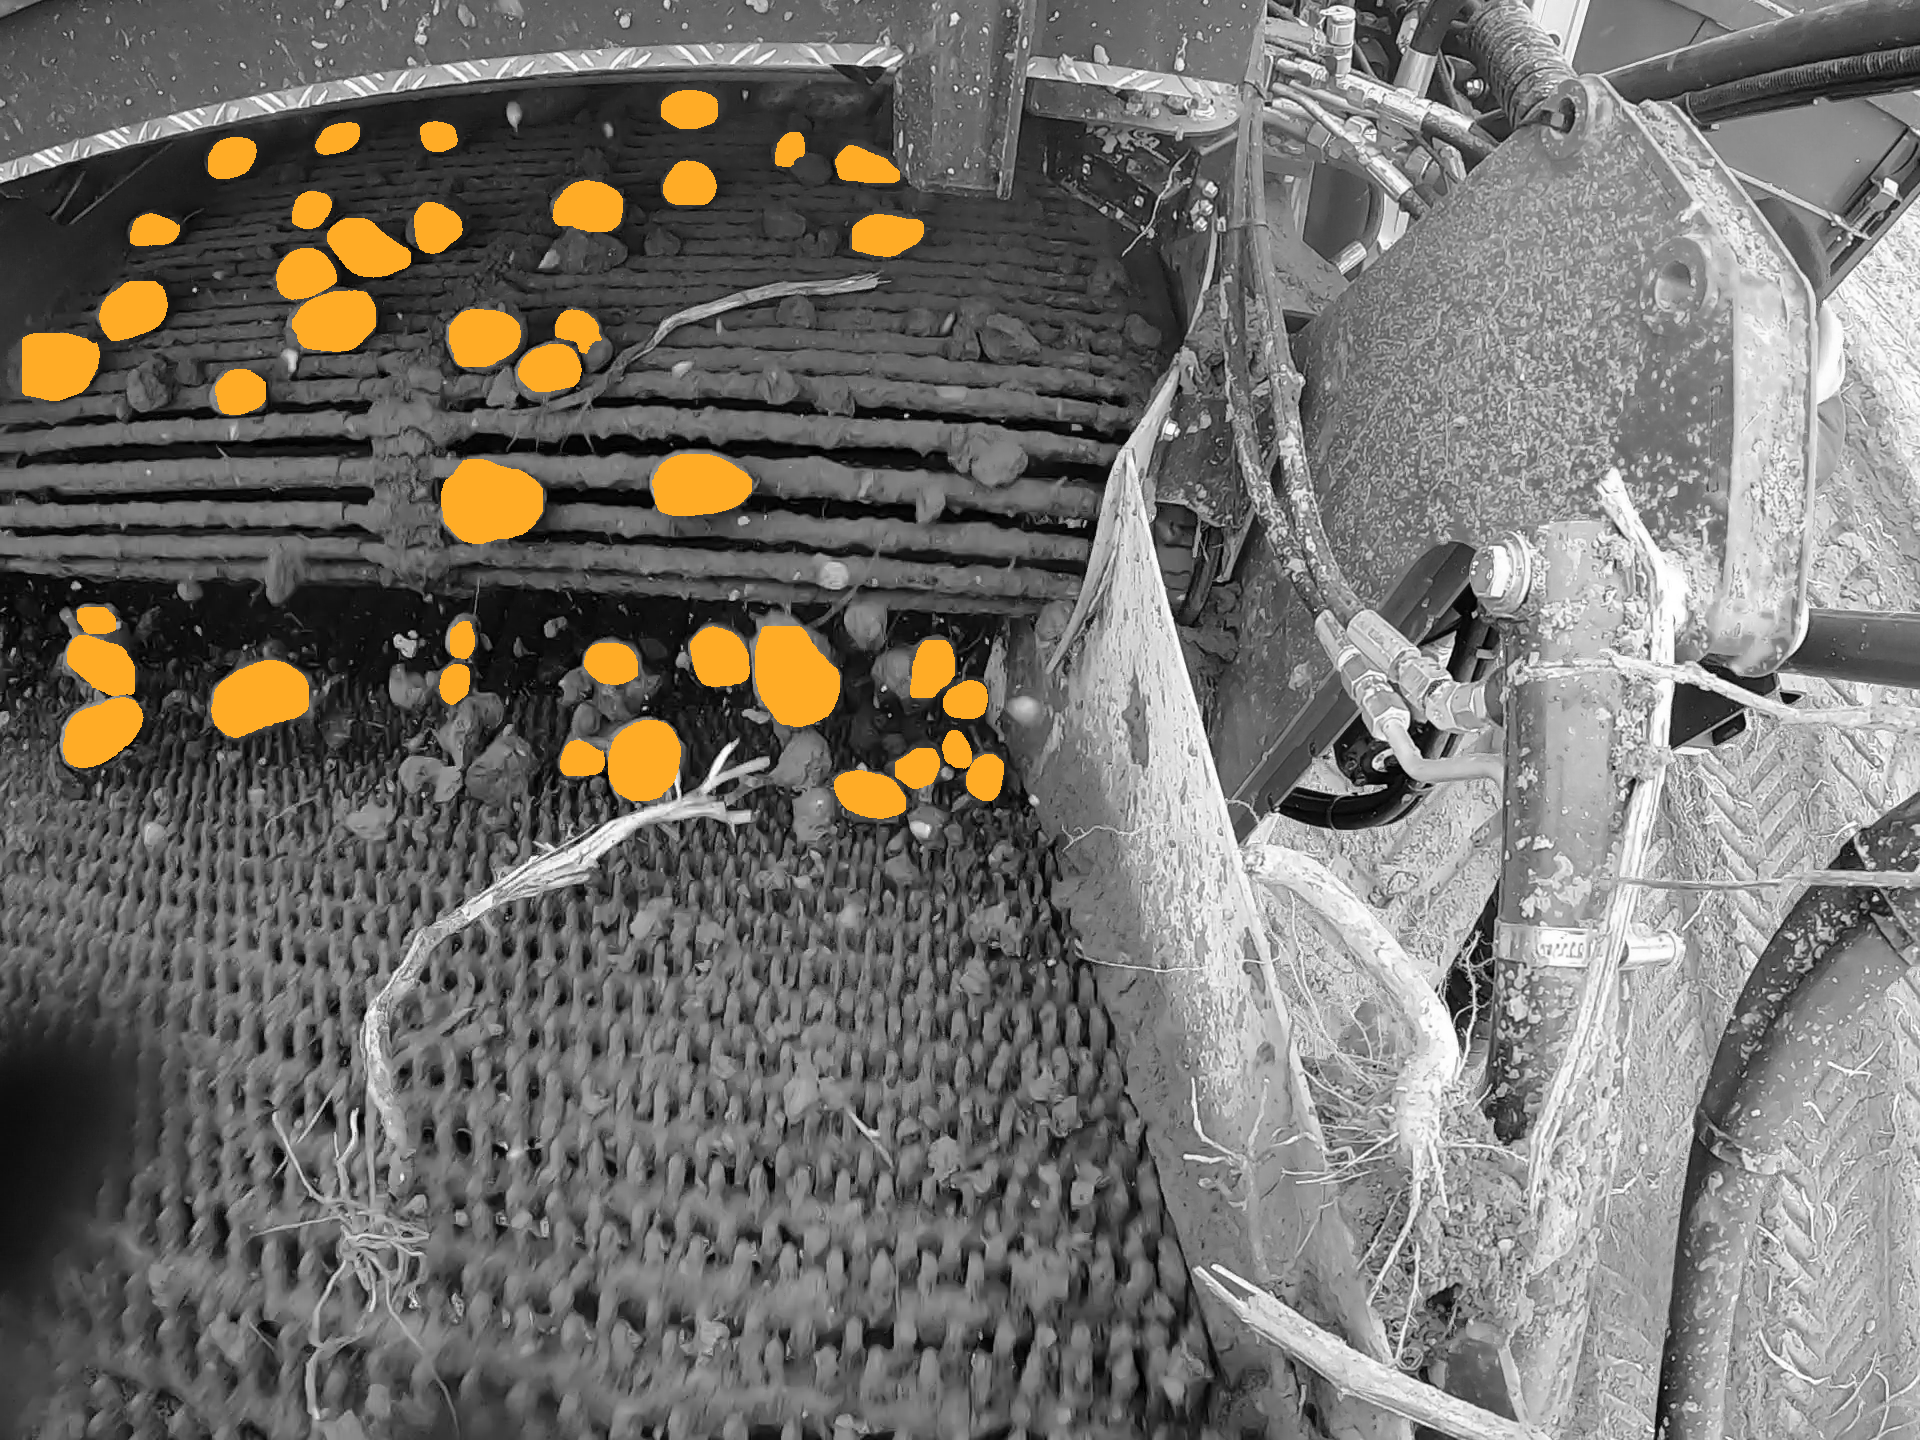

In [57]:
Image.fromarray(splash, 'RGB')